# CS 513 Geospatial Vision Assignment 2
***
**Probe data matching**

## EDA

### Data loading

In [2]:
import os
file_path = 'D:/Data/probe_match'

In [3]:
import numpy as np
import pandas as pd

In [4]:
probe = pd.read_csv(os.path.join(file_path, 'Partition6467ProbePoints.csv'), names = ['sampleID', 'dateTime', 'sourceCode', 'latitude', 'longitude', 'altitude', 'speed', 'heading'])
print("probe shape: ", probe.shape)
link = pd.read_csv(os.path.join(file_path, 'Partition6467LinkData.csv'), names = ['linkPVID', 'refNodeID', 'nrefNodeID', 'length', 'functionalClass', 'directionOfTravel', 'speedCategory', 'fromRefSpeedLimit', 'toRefSpeedLimit', 'fromRefNumLanes', 'toRefNumLanes', 'multiDigitized', 'urban', 'timeZone', 'shapeInfo', 'curvatureInfo', 'slopeInfo'])
print("link shape: ", link.shape)

probe shape:  (3375745, 8)
link shape:  (200089, 17)


In [5]:
probe.head()

,sampleID,dateTime,sourceCode,latitude,longitude,altitude,speed,heading
0,3496,6/12/2009 6:12:49 AM,13,51.496868,9.386022,200,23,339
1,3496,6/12/2009 6:12:54 AM,13,51.496682,9.386157,200,10,129
2,3496,6/12/2009 6:12:59 AM,13,51.496705,9.386422,201,21,60
3,3496,6/12/2009 6:13:04 AM,13,51.496749,9.386840,201,0,360
4,3496,6/12/2009 6:13:09 AM,13,51.496864,9.387294,199,0,360


In [6]:
link.head()

,linkPVID,refNodeID,nrefNodeID,length,functionalClass,directionOfTravel,speedCategory,fromRefSpeedLimit,toRefSpeedLimit,fromRefNumLanes,toRefNumLanes,multiDigitized,urban,timeZone,shapeInfo,curvatureInfo,slopeInfo
0,62007637,162844982,162809070,335.04,5,B,7,30,30,0,0,F,T,0.0,51.4965800/9.3862299/|51.4994700/9.3848799/,NaN,NaN
1,567329767,162844982,162981512,134.56,5,B,7,0,0,0,0,F,T,0.0,51.4965800/9.3862299/|51.4966899/9.3867100/|51...,NaN,NaN
2,62007648,162877732,162844982,97.01,5,B,7,30,30,0,0,F,T,0.0,51.4962899/9.3849100/|51.4965800/9.3862299/,NaN,NaN
3,78670326,162877732,163152693,314.84,5,B,7,30,30,0,0,F,T,0.0,51.4962899/9.3849100/|51.4990000/9.3836099/,NaN,NaN
4,51881672,174713859,174587951,110.17,3,B,6,50,50,2,2,F,T,0.0,53.0643099/8.7903400/45.79|53.0650299/8.791470...,NaN,0.00/-0.090|110.17/0.062


### Convert nested data string to list

In [7]:
def nan_split(text, deli):
  import math
  try:
    r = text.split(deli)
  except:
    r = []
  return r
link['shapeInfo'] = link['shapeInfo'].map(lambda x: list(map(lambda y: nan_split(y, '/'), nan_split(x, '|'))))
link['curvatureInfo'] = link['curvatureInfo'].map(lambda x: list(map(lambda y: nan_split(y, '/'), nan_split(x, '|'))))
link['slopeInfo'] = link['slopeInfo'].map(lambda x: list(map(lambda y: nan_split(y, '/'), nan_split(x, '|'))))

In [8]:
link.head()

,linkPVID,refNodeID,nrefNodeID,length,functionalClass,directionOfTravel,speedCategory,fromRefSpeedLimit,toRefSpeedLimit,fromRefNumLanes,toRefNumLanes,multiDigitized,urban,timeZone,shapeInfo,curvatureInfo,slopeInfo
0,62007637,162844982,162809070,335.04,5,B,7,30,30,0,0,F,T,0.0,"[[51.4965800, 9.3862299, ], [51.4994700, 9.384...",[],[]
1,567329767,162844982,162981512,134.56,5,B,7,0,0,0,0,F,T,0.0,"[[51.4965800, 9.3862299, ], [51.4966899, 9.386...",[],[]
2,62007648,162877732,162844982,97.01,5,B,7,30,30,0,0,F,T,0.0,"[[51.4962899, 9.3849100, ], [51.4965800, 9.386...",[],[]
3,78670326,162877732,163152693,314.84,5,B,7,30,30,0,0,F,T,0.0,"[[51.4962899, 9.3849100, ], [51.4990000, 9.383...",[],[]
4,51881672,174713859,174587951,110.17,3,B,6,50,50,2,2,F,T,0.0,"[[53.0643099, 8.7903400, 45.79], [53.0650299, ...",[],"[[0.00, -0.090], [110.17, 0.062]]"


### Probe data EDA

In [9]:
from matplotlib import pyplot as plt
plt.hist(probe.groupby('sampleID').size(), bins = range(0, 300, 10))

(array([2.2750e+03, 3.4040e+03, 1.7587e+04, 1.5756e+04, 1.6230e+03,
        1.9390e+03, 3.1454e+04, 4.5500e+02, 1.8000e+01, 1.5000e+01,
        2.8000e+01, 3.6000e+01, 1.0250e+03, 2.1000e+01, 9.0000e+00,
        7.0000e+00, 3.0000e+00, 3.0000e+00, 1.7200e+02, 2.0000e+00,
        1.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290]),
 <a list of 29 Patch objects>)

The trips are ususally less than 100 times reports.

(array([3175., 1942., 2340., 2566., 3047., 3103., 3079., 3279., 3162.,
        3449., 3545., 3663., 3547., 3202., 2923., 2657., 2653., 2609.,
        2278., 2251., 2354., 2424., 2635., 2656., 2395., 2020., 1581.,
         902.,  403.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145]),
 <a list of 29 Patch objects>)

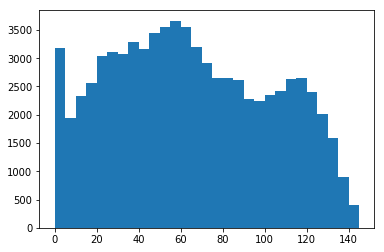

In [10]:
plt.hist(probe.groupby('sampleID').mean()['speed'], bins = range(0, 150, 5))

Crazy Germen, they don't have speed limit on highway.

In [11]:
from datetime import datetime  
format = '%m/%d/%Y %I:%M:%S %p'
(datetime.strptime(probe['dateTime'][1], format) - datetime.strptime(probe['dateTime'][0], format)).seconds

5

## Probe matching

In [12]:
list(map(lambda x: len(x), link['shapeInfo'])).count(1)

0

For the 'shapeInfo', at least two nodes are included in a link.

The distribution of number of nodes on each link:

(array([    0.,     0., 72828., 35503., 25902., 18359., 12320.,  8540.,
        10198.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

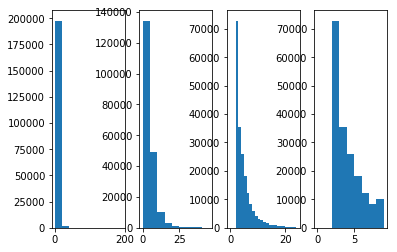

In [13]:
from matplotlib import pyplot as plt
nodes_count = list(map(lambda x: len(x), link['shapeInfo']))
plt.subplot(141)
plt.hist(nodes_count)
plt.subplot(142)
plt.hist(nodes_count, bins = np.arange(0, 50, 5))
plt.subplot(143)
plt.hist(nodes_count, bins = np.arange(0, 25, 1))
plt.subplot(144)
plt.hist(nodes_count, bins = np.arange(0, 10, 1))

The distribution of length of links. Mainly in 0-300 meter.


(array([  61.,  987., 2792., 3560., 4360., 4843., 5247., 5380., 5724.,
        5832., 5837., 5806., 5687., 5538., 5555., 5280., 5361., 5021.,
        4971., 4608., 4492., 4371., 3983., 3789., 3763., 3426., 3300.,
        3133., 3017., 2871., 2671., 2495., 2491., 2357., 2302., 2173.,
        1940., 1975., 1927., 1759., 1647., 1671., 1565., 1445., 1332.,
        1317., 1318., 1210., 1119., 1069., 1023.,  993.,  903.,  914.,
         841.,  810.,  810.,  725.,  687.,  686.,  661.,  626.,  585.,
         582.,  562.,  537.,  522.,  515.,  459.,  470.,  428.,  461.,
         419.,  412.,  431.,  361.,  378.,  340.,  364.,  341.,  333.,
         327.,  313.,  317.,  295.,  301.,  261.,  282.,  257.,  264.,
         248.,  241.,  252.,  232.,  225.,  215.,  215.,  218.,  198.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190

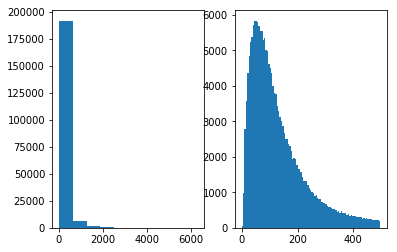

In [14]:
plt.subplot(121)
plt.hist(link['length'])
plt.subplot(122)
plt.hist(link['length'], bins=np.arange(0, 500, 5))

In [15]:
print(link.groupby('speedCategory').count()['length'])
print(link.groupby('speedCategory').max()['length'])

speedCategory
1     5057
2     2884
3    15136
4    26376
5    28839
6    88284
7    30462
8     3051
Name: length, dtype: int64
speedCategory
1    5053.44
2    6301.89
3    4277.37
4    5523.57
5    5442.05
6    3479.27
7    3874.81
8    2895.24
Name: length, dtype: float64


(array([  34., 1125., 2959., 3868., 5186., 6828., 8091., 9038., 9348.,
        9390., 9463., 9057., 8589., 8531., 7678., 7472., 6750., 6324.,
        5961., 5448., 4989., 4611., 4255., 3994., 3501., 3271., 3095.,
        2744., 2520., 2269., 2189., 2031., 1843., 1596., 1604., 1408.,
        1419., 1218., 1135., 1052., 1024.,  974.,  877.,  853.,  746.,
         673.,  659.,  639.,  563.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
        68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]),
 <a list of 49 Patch objects>)

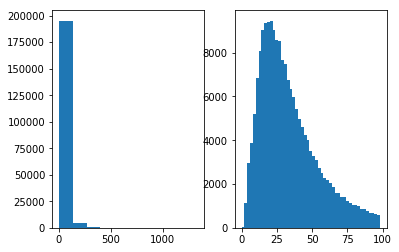

In [16]:
plt.subplot(121)
plt.hist(link['length']/nodes_count)
plt.subplot(122)
plt.hist(link['length']/nodes_count, bins=np.arange(0, 100, 2))

Usually, it takes less than 80 meter to meet a crucial point (reference point, shape point), in average. Some links have really sparse crucial points. The length between most of crucials points are small.

In [17]:
sum(link['length']/nodes_count > 80)

18202

### Build node list

In [18]:
%%time
columns = ['latitude', 'longitude', 'elevation', 'sequence', 'link']
nodes = pd.DataFrame(columns = columns)
def addNode(alink):
  columns = ['latitude', 'longitude', 'elevation', 'sequence', 'link']
  df = pd.DataFrame(columns = columns)
  somenodes = alink.tolist()[-3]
  for i in range(len(somenodes)):
    df = df.append(pd.DataFrame(np.array([[somenodes[i][0], somenodes[i][1], somenodes[i][2], i, np.nan]]), columns = columns), ignore_index = True)
  df['link'] = alink[0]
  return df
for index, row in link.iterrows():
  nodes = nodes.append(addNode(row), ignore_index = True)
  if index > 100:
    break
print(nodes.head())

     latitude  longitude elevation sequence       link
0  51.4965800  9.3862299                  0   62007637
1  51.4994700  9.3848799                  1   62007637
2  51.4965800  9.3862299                  0  567329767
3  51.4966899  9.3867100                  1  567329767
4  51.4968000  9.3873199                  2  567329767
Wall time: 365 ms


In [19]:
%%time

columns = ['latitude', 'longitude', 'elevation', 'sequence', 'link']
nodes = []
def addNodeList(alink):
  somenodes = alink.tolist()[-3]
  df = list([somenodes[i][0], somenodes[i][1], somenodes[i][2], i, alink[0]] for i in range(len(somenodes)))
  return df
for index, row in link.iterrows():
  nodes.extend(addNodeList(row))
  #if index > 10000:
  #  break
nodes = pd.DataFrame(nodes, columns = columns)
print(nodes.head())

     latitude  longitude elevation  sequence       link
0  51.4965800  9.3862299                   0   62007637
1  51.4994700  9.3848799                   1   62007637
2  51.4965800  9.3862299                   0  567329767
3  51.4966899  9.3867100                   1  567329767
4  51.4968000  9.3873199                   2  567329767
Wall time: 20.5 s


In [20]:
nodes.shape

(920066, 5)

For every probe data point, find the some nearest points, then derive some nearest links. Compare to match the probe to a link.

Might need to consider the directions for each probe data, for example, find the cosine similarity and return the one with highest similarity. Or consider both distance and cosine similarity.

In [21]:
def findNearestLinks(probe, nodes, neighborhoodSize = 3):
  return

## Visualization

### Draw a Google map (doesn't work in CoLab)

In [22]:
import gmaps
import ipywidgets as widgets
gmaps.configure()
def coordMaker(nodes):
    lst_lat = [float(i) for i in nodes['latitude']]
    lst_lon = [float(i) for i in nodes['longitude']]
    return (sum(lst_lat)/len(lst_lat), sum(lst_lon)/len(lst_lon))

In [ ]:
nodes_locations = nodes[['latitude', 'longitude']].astype(dtype=np.float64)
center_coordinates = coordMaker(nodes_locations)
fig = gmaps.figure(center=center_coordinates, zoom_level=12, map_type='TERRAIN')
heatmap_layer = gmaps.heatmap_layer(nodes_locations)
fig.add_layer(heatmap_layer)
fig

In [25]:
probe_locations = probe[['latitude', 'longitude']].astype(dtype=np.float64)
center_coordinates = coordMaker(probe_locations)
fig = gmaps.figure(center=center_coordinates, zoom_level=12, map_type='TERRAIN')
heatmap_layer = gmaps.heatmap_layer(probe_locations)
fig.add_layer(heatmap_layer)
fig

0          51.496868
1          51.496682
2          51.496705
3          51.496749
4          51.496864
5          51.496930
6          51.496957
7          51.496952
8          51.496949
9          51.496944
10         51.496941
11         51.496939
12         51.496937
13         51.496936
14         51.496936
15         51.496935
16         51.496934
17         51.496932
18         51.496932
19         51.496931
20         51.496931
21         51.496930
22         51.496931
23         51.496931
24         51.496931
25         51.496932
26         51.496932
27         51.496932
28         51.496932
29         51.496932
             ...    
3375715    51.986303
3375716    51.986310
3375717    51.984307
3375718    51.984345
3375719    51.984497
3375720    51.984520
3375721    52.219883
3375722    52.220698
3375723    52.221118
3375724    52.221432
3375725    52.221615
3375726    52.221931
3375727    52.222208
3375728    52.222128
3375729    52.221380
3375730    52.220894
3375731    52

### Draw a map using Basemap